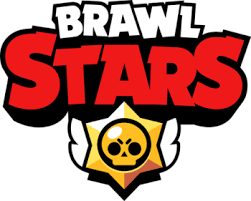

## Brawl Stars Data Science - Get Missing Gadgets and Star Powers

This script connects with the official Brawl Stars API and retrieves various info about a player and their brawlers. Then, it discover the information (brawler, name) of all the missing gadgets and star powers of the account, that are readily available in boxes or potentially in the shop.

In [1]:
# Install Libraries
!pip install brawlstats

In [2]:
# Import libraries
import brawlstats
from parameters import *  # Change to parameters_template and add your API KEY.
import numpy as np
import pandas as pd

In [3]:
# Connect with the client using your unique token
client = brawlstats.Client(api_token)

In [4]:
# Create player profile
profile = client.get_profile(player_tag)

In [5]:
# Keep only the brawler info
brawlers_dict = profile.raw_data['brawlers']

In [6]:
# Create the placeholder df
brawlers_info = pd.DataFrame(index=list(range(0, len(brawlers_dict))),
                             columns = ['Name', 'Power', 'Rank', 'Trophies', 'Highest Trophies',
                                        'Gadget 1', 'Gadget 2', 'Star Power 1', 'Star Power 2'])

In [7]:
# Fill the placeholder df
for i in list(range(0, len(brawlers_dict))):
    brawlers_info.loc[i,'Name'] = brawlers_dict[i]['name']
    brawlers_info.loc[i,'Power'] = brawlers_dict[i]['power']
    brawlers_info.loc[i,'Rank'] = brawlers_dict[i]['rank']
    brawlers_info.loc[i,'Trophies'] = brawlers_dict[i]['trophies']
    brawlers_info.loc[i,'Highest Trophies'] = brawlers_dict[i]['highestTrophies']
    if len(brawlers_dict[i]['gadgets'])==0:
        brawlers_info.loc[i,'Gadget 1'] = None
        brawlers_info.loc[i,'Gadget 2'] = None
    elif len(brawlers_dict[i]['gadgets'])==1:
        brawlers_info.loc[i,'Gadget 1'] = brawlers_dict[i]['gadgets'][0]['name']
        brawlers_info.loc[i,'Gadget 2'] = None
    elif len(brawlers_dict[i]['gadgets'])==2:
        brawlers_info.loc[i,'Gadget 1'] = brawlers_dict[i]['gadgets'][0]['name']
        brawlers_info.loc[i,'Gadget 2'] = brawlers_dict[i]['gadgets'][1]['name']
    if len(brawlers_dict[i]['starPowers'])==0:
        brawlers_info.loc[i,'Star Power 1'] = None
        brawlers_info.loc[i,'Star Power 2'] = None
    elif len(brawlers_dict[i]['starPowers'])==1:
        brawlers_info.loc[i,'Star Power 1'] = brawlers_dict[i]['starPowers'][0]['name']
        brawlers_info.loc[i,'Star Power 2'] = None
    elif len(brawlers_dict[i]['starPowers'])==2:
        brawlers_info.loc[i,'Star Power 1'] = brawlers_dict[i]['starPowers'][0]['name']
        brawlers_info.loc[i,'Star Power 2'] = brawlers_dict[i]['starPowers'][1]['name']

In [8]:
brawlers_info

,Name,Power,Rank,Trophies,Highest Trophies,Gadget 1,Gadget 2,Star Power 1,Star Power 2
0,SHELLY,9,22,609,609,CLAY PIGEONS,FAST FORWARD,None,None
1,COLT,8,21,537,573,SPEEDLOADER,SILVER BULLET,None,None
2,BULL,8,20,500,500,T-BONE INJECTOR,STOMPER,None,None
3,BROCK,5,15,335,335,None,None,None,None
4,RICO,6,15,302,302,None,None,None,None
5,BARLEY,6,15,309,313,None,None,None,None
6,JESSIE,10,22,624,626,RECOIL SPRING,SPARK PLUG,ENERGIZE,SHOCKY
7,NITA,7,20,513,513,BEAR PAWS,None,None,None
8,DYNAMIKE,6,13,224,224,None,None,None,None
9,EL PRIMO,7,21,574,574,SUPLEX SUPPLEMENT,None,None,None


In [9]:
# Get info about all brawlers of the game
brawlers = client.get_brawlers(player_tag)

In [10]:
all_brawlers_dict = brawlers.raw_data

In [11]:
all_brawlers_info = pd.DataFrame(index=list(range(0, len(all_brawlers_dict))),
                             columns = ['Name', 'Gadget 1', 'Gadget 2',
                                        'Star Power 1', 'Star Power 2'])

In [12]:
# Fill the placeholder df
for i in list(range(0, len(all_brawlers_dict))):
    all_brawlers_info.loc[i,'Name'] = all_brawlers_dict[i]['name']
    if len(all_brawlers_dict[i]['gadgets'])==0:
        all_brawlers_info.loc[i,'Gadget 1'] = None
        all_brawlers_info.loc[i,'Gadget 2'] = None
    elif len(all_brawlers_dict[i]['gadgets'])==1:
        all_brawlers_info.loc[i,'Gadget 1'] = all_brawlers_dict[i]['gadgets'][0]['name']
        all_brawlers_info.loc[i,'Gadget 2'] = None
    elif len(all_brawlers_dict[i]['gadgets'])==2:
        all_brawlers_info.loc[i,'Gadget 1'] = all_brawlers_dict[i]['gadgets'][0]['name']
        all_brawlers_info.loc[i,'Gadget 2'] = all_brawlers_dict[i]['gadgets'][1]['name']
    if len(all_brawlers_dict[i]['starPowers'])==0:
        all_brawlers_info.loc[i,'Star Power 1'] = None
        all_brawlers_info.loc[i,'Star Power 2'] = None
    elif len(all_brawlers_dict[i]['starPowers'])==1:
        all_brawlers_info.loc[i,'Star Power 1'] = all_brawlers_dict[i]['starPowers'][0]['name']
        all_brawlers_info.loc[i,'Star Power 2'] = None
    elif len(all_brawlers_dict[i]['starPowers'])==2:
        all_brawlers_info.loc[i,'Star Power 1'] = all_brawlers_dict[i]['starPowers'][0]['name']
        all_brawlers_info.loc[i,'Star Power 2'] = all_brawlers_dict[i]['starPowers'][1]['name']

In [13]:
all_brawlers_info 

,Name,Gadget 1,Gadget 2,Star Power 1,Star Power 2
0,SHELLY,FAST FORWARD,CLAY PIGEONS,SHELL SHOCK,BAND-AID
1,COLT,SPEEDLOADER,SILVER BULLET,SLICK BOOTS,MAGNUM SPECIAL
2,BULL,T-BONE INJECTOR,STOMPER,BERSERKER,TOUGH GUY
3,BROCK,ROCKET LACES,ROCKET FUEL,INCENDIARY,ROCKET NO. 4
4,RICO,MULTIBALL LAUNCHER,None,SUPER BOUNCY,ROBO RETREAT
5,SPIKE,POPPING PINCUSHION,None,FERTILIZE,CURVEBALL
6,BARLEY,STICKY SYRUP MIXER,HERBAL TONIC,MEDICAL USE,EXTRA NOXIOUS
7,JESSIE,SPARK PLUG,RECOIL SPRING,ENERGIZE,SHOCKY
8,NITA,BEAR PAWS,FAUX FUR,BEAR WITH ME,HYPER BEAR
9,DYNAMIKE,FIDGET SPINNER,SATCHEL CHARGE,DYNA-JUMP,DEMOLITION


In [14]:
# Find missing gadgets that can potentially appear on boxes
missing_gadgets = {}

In [15]:
# Keep either all the brawlers that the player has or the ones that have the required level
if only_available_in_boxes:
    brawl_names = brawlers_info[brawlers_info['Power']>=7]['Name']
else:
    brawl_names = brawlers_info['Name']

# Run loop for each brawler
for i in brawl_names:
    
    # count the number of all gadgets
    all_gadgets = []
    if all_brawlers_info[all_brawlers_info['Name']==i]['Gadget 1'].iloc[0] != None:
        all_gadgets.append(all_brawlers_info[all_brawlers_info['Name']==i]['Gadget 1'].iloc[0])
    if all_brawlers_info[all_brawlers_info['Name']==i]['Gadget 2'].iloc[0] != None:
        all_gadgets.append(all_brawlers_info[all_brawlers_info['Name']==i]['Gadget 2'].iloc[0])

    # Count the gadgets that the player has
    player_gadgets = []
    if brawlers_info[brawlers_info['Name']==i]['Gadget 1'].iloc[0] != None:
        player_gadgets.append(brawlers_info[brawlers_info['Name']==i]['Gadget 1'].iloc[0])
    if brawlers_info[brawlers_info['Name']==i]['Gadget 2'].iloc[0] != None:
        player_gadgets.append(brawlers_info[brawlers_info['Name']==i]['Gadget 2'].iloc[0])
        
    # Reconcile the missing gadgets
    missing_gadgets_list = list(set(all_gadgets) - set(player_gadgets))
    if len(missing_gadgets_list)>0:
        missing_gadgets[i] = missing_gadgets_list

In [16]:
# Find missing star powers that can potentially appear on boxes
missing_star_powers = {}

In [17]:
# Keep either all the brawlers that the player has or the ones that have the required level
if only_available_in_boxes:
    brawl_names = brawlers_info[brawlers_info['Power']>=9]['Name']
else:
    brawl_names = brawlers_info['Name']

# Run loop for each brawler
for i in brawl_names:
    
    # count the number of all star powers
    all_star_powers = []
    if all_brawlers_info[all_brawlers_info['Name']==i]['Star Power 1'].iloc[0] != None:
        all_star_powers.append(all_brawlers_info[all_brawlers_info['Name']==i]['Star Power 1'].iloc[0])
    if all_brawlers_info[all_brawlers_info['Name']==i]['Star Power 2'].iloc[0] != None:
        all_star_powers.append(all_brawlers_info[all_brawlers_info['Name']==i]['Star Power 2'].iloc[0])

    # Count the star_powers that the player has
    player_star_powers = []
    if brawlers_info[brawlers_info['Name']==i]['Star Power 1'].iloc[0] != None:
        player_star_powers.append(brawlers_info[brawlers_info['Name']==i]['Star Power 1'].iloc[0])
    if brawlers_info[brawlers_info['Name']==i]['Star Power 2'].iloc[0] != None:
        player_star_powers.append(brawlers_info[brawlers_info['Name']==i]['Star Power 2'].iloc[0])
        
    # Reconcile the missing gadgets
    missing_star_powers_list = list(set(all_star_powers) - set(player_star_powers))
    if len(missing_star_powers_list)>0:
        missing_star_powers[i] = missing_star_powers_list

In [18]:
print('The missing gadgets that the player can get from boxes are:')
print('')
for i in missing_gadgets:
    print('{}: {}'.format(i, missing_gadgets[i]))

The missing gadgets that the player can get from boxes are:

NITA: ['FAUX FUR']
EL PRIMO: ['ASTEROID BELT']
POCO: ['TUNING FORK', 'PROTECTIVE TUNES']
BO: ['TRIPWIRE']
BYRON: ['SHOT IN THE ARM']
STU: ['SPEED ZONE']
BELLE: ['NEST EGG']


In [19]:
print('The missing star powers that the player can get from boxes are:')
print('')
for i in missing_star_powers:
    print('{}: {}'.format(i, missing_star_powers[i]))

The missing star powers that the player can get from boxes are:

SHELLY: ['BAND-AID', 'SHELL SHOCK']
